In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Cargar los datos
data = pd.read_csv("/Users/oscarcortes/Downloads/comprar_alquilar.csv")

In [3]:
# Separar las características de la variable objetivo
X = data.drop("comprar", axis=1)
y = data["comprar"]

In [4]:
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [6]:
# Varianza explicada acumulada
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)


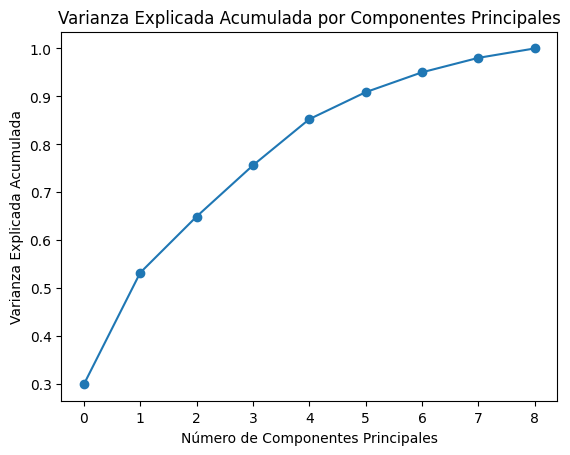

In [7]:
# Gráfica de varianza explicada acumulada
plt.plot(explained_variance_ratio, marker='o')
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Varianza Explicada Acumulada por Componentes Principales")
plt.show()


In [8]:
# Elegir el número de componentes principales
num_components = 4  # Elegir el número de componentes que conservan suficiente varianza


In [9]:
# Obtener los componentes principales seleccionados
selected_components = pca.components_[:num_components]


In [10]:
# Entrenar y evaluar un modelo de predicción (por ejemplo, Regresión Logística)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [11]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


In [12]:
# Interpretar los resultados
print(f"Número de Componentes Principales seleccionados: {num_components}")
print(f"Varianza Explicada acumulada con {num_components} componentes: {explained_variance_ratio[num_components-1]:.2f}")
print(f"Precisión del modelo: {accuracy:.2f}")
print("Reporte de Clasificación:")
print(classification_rep)


Número de Componentes Principales seleccionados: 4
Varianza Explicada acumulada con 4 componentes: 0.76
Precisión del modelo: 0.95
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.88      0.94        17

    accuracy                           0.95        41
   macro avg       0.96      0.94      0.95        41
weighted avg       0.95      0.95      0.95        41



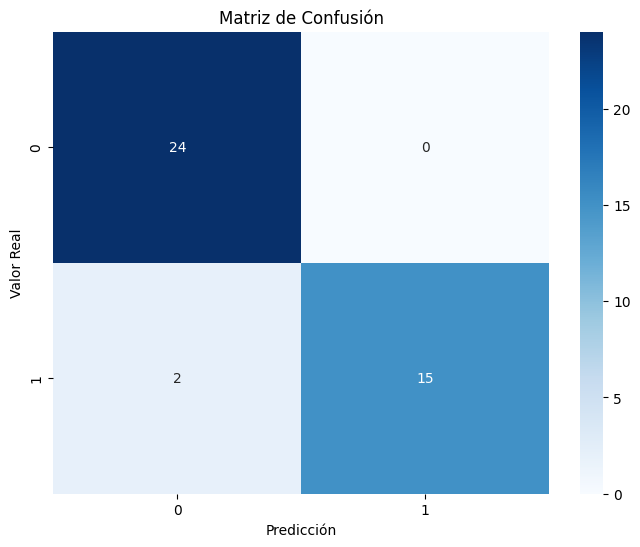

In [13]:
# Matriz de Confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()